In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
%matplotlib inline

In [2]:
path = "/home/ankit/anaconda2/pkgs/basemap-1.0.7-np111py27_0/lib/python2.7/site-packages/mpl_toolkits/basemap/data/"

Some of the data files have fields that contain NAs for older time periods. In order to collapse the data sets into one file, all numerical data will be stored in float fields (integer fields do not support NA missing values). To do this, we first define a conversion dictionary that stores the numeric fields with lookups to the *float* data type.

In [3]:
convert_float = dict([s, float] for s in
                     ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
                      'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',                      
                      'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
                      'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                      'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                      'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog',
                      'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 
                      'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 
                      'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 
                      'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 
                      'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
                      'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
                      'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
                      'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
                      'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 
                      'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
                      'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
                      'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
                      'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
                      'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'])

We also define a dictionary of string fields, to handle situations where the inferred data type might be numeric even though the field should be read in as a string/object.

In [4]:
convert_str = dict([s, str] for s in
                    ['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 
                     'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 
                     'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 
                     'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
                     'policy_code', 'application_type', 'verification_status_joint'])

We read the input data from the CSV data files using pandas *read_csv*. There is a blank row in the data header and there are two blank rows in the footer of each file. To allow the use of *skip_footer*, we use the python engine rather than the C engine. The first two columns (*id* and *member_id*) are unique and used to create a table index.

In [5]:
data = pd.read_csv("./data/LoanStats3d.csv",
                   skiprows=1,
                   skip_footer=2,
                   engine="python",
                   na_values=['NaN', 'nan'],
                   converters=convert_str,
                   index_col=[0,1])

In [6]:
print "Data table dimensions: %d x %d" % data.shape

Data table dimensions: 421095 x 109


In [7]:
data.head()

,,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,member_id,,,,,,,,,,,,,,,,,,,,,
68516507,73406314,14000,14000,14000,36 months,9.80%,450.43,B,B3,Master mechanic,4 years,...,0,2,100.0,0.0,0,0,531602,84039,34500,55842
68587652,73477494,25000,25000,25000,36 months,5.32%,752.87,A,A1,Director,1 year,...,0,1,100.0,0.0,0,0,512381,44786,44000,51081
68009401,72868139,16000,16000,16000,60 months,14.85%,379.39,C,C5,Bookkeeper/Accounting,10+ years,...,0,2,78.9,0.0,0,2,298100,31329,281300,13400
68416935,73306760,15000,15000,15000,36 months,9.80%,482.61,B,B3,Electronic Branch Manager,3 years,...,0,4,100.0,0.0,1,0,347470,53397,36100,47370
68357012,73246847,15000,15000,15000,36 months,8.49%,473.45,B,B1,Senior Associate,6 years,...,0,4,100.0,20.0,1,0,369112,27849,28200,21124


Check the count of fields by data type:

In [8]:
data.dtypes.value_counts()

float64    43
int64      40
object     26
dtype: int64

Depending on the specific dataset used, the numeric values may be read in as integers. For best performance and to enable mergining of the datasets, we convert those fields to floats (which allow NaN values):

In [9]:
for k, v in convert_float.items():
    data[k] = data[k].astype(v)

Checking the data types after the float conversion:

In [10]:
data.dtypes.value_counts()

float64    83
object     26
dtype: int64

The object fields need some more processing. First, we list out those fields:

In [11]:
data.dtypes[data.dtypes=="object"]

term                         object
int_rate                     object
grade                        object
sub_grade                    object
emp_title                    object
emp_length                   object
home_ownership               object
verification_status          object
issue_d                      object
loan_status                  object
pymnt_plan                   object
url                          object
desc                         object
purpose                      object
title                        object
zip_code                     object
addr_state                   object
earliest_cr_line             object
revol_util                   object
initial_list_status          object
last_pymnt_d                 object
next_pymnt_d                 object
last_credit_pull_d           object
policy_code                  object
application_type             object
verification_status_joint    object
dtype: object

There are 5 object fields that contain dates in the format *YYYY-MMM* (e.g. '2010-Jan'). We parse those to return datetime fields, which are more easily input into time series models or plotted in charts.

In [12]:
data.issue_d = pd.to_datetime(data.issue_d, errors="coerce")
data.last_pymnt_d = pd.to_datetime(data.last_pymnt_d, errors="coerce")
data.next_pymnt_d = pd.to_datetime(data.next_pymnt_d, errors="coerce")
data.last_credit_pull_d = pd.to_datetime(data.last_credit_pull_d, errors="coerce")
data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line, errors="coerce")

Many of the remaining fields contain categorical data. We use the pandas *category* data type to store the data more efficiently.

In [13]:
data.term = pd.Categorical(data.term, categories= [" 36 months", " 60 months", "None"])
data.grade = pd.Categorical(data.grade, categories=["A", "B", "C", "D", "E", "F", "G", "None"])
data.sub_grade = pd.Categorical(data.sub_grade, categories=["A1", "A2", "A3", "A4", "A5",
                                                            "B1", "B2", "B3", "B4", "B5", 
                                                            "C1", "C2", "C3", "C4", "C5",
                                                            "D1", "D2", "D3", "D4", "D5",
                                                            "E1", "E2", "E3", "E4", "E5",
                                                            "F1", "F2", "F3", "F4", "F5",
                                                            "G1", "G2", "G3", "G4", "G5",
                                                            "None"])
data.home_ownership = pd.Categorical(data.home_ownership.str.title(), categories=["Own", "Mortgage", "Rent", "Any", "Other", "None"])
data.emp_length = pd.Categorical(data.emp_length, categories=["< 1 year", "1 year", "2 years", "3 years",
                                                              "4 years", "5 years", "6 years", "7 years",
                                                              "8 years", "9 years", "10+ years", "n/a", "None"])
data.verification_status = pd.Categorical(data.verification_status, categories=["Verified", "Source Verified", "Not Verified", "None"])
data.loan_status = pd.Categorical(data.loan_status, categories=["Fully Paid", "Current", "Charged Off",
                                                                "Does not meet the credit policy. Status:Fully Paid",
                                                                "Does not meet the credit policy. Status:Charged Off",
                                                                "In Grace Period", "Late (16-30 days)", "Late (31-120 days)",
                                                                "Default", "None"])
data.pymnt_plan = pd.Categorical(data.pymnt_plan.str.title(), categories=["Y", "N", "None"])
data.purpose = pd.Categorical(data.purpose.str.title(),
                              categories=["Debt_Consolidation", "Credit_Card", "Home_Improvement", "Major_Purchase", 
                                          "Small_Business", "Car", "Wedding", "Medical", "Moving", "House",
                                          "Educational", "Vacation", "Renewable_Energy", "Other", "None"])
data.addr_state = pd.Categorical(data.addr_state,
                                 categories=["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL",
                                             "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA",
                                             "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE",
                                             "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI",
                                             "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV",
                                             "WY", "None"])
data.initial_list_status = pd.Categorical(data.initial_list_status, categories=["f", "w", "None"])
data.policy_code = pd.Categorical(data.policy_code, categories=["1", "None"])
data.application_type = pd.Categorical(data.application_type.str.title(), categories=["Individual", "Joint", "None"])
data.verification_status_joint = pd.Categorical(data.verification_status_joint, categories=["Verified", "Source Verified", "Not Verified", "None"])

To validate the categorical data conversion, we check a table listing Null values for each field. If any categories were excluded inadvertently, the *Null Count* in this table would show up as > 0. The *verification_status_joint* field does not appear to contain valid data for the datasets that have been analyzed.

In [14]:
pd.DataFrame([[f, sum(pd.isnull(data[f]))] for f in data.columns[data.dtypes=="category"]],
             columns=["Categorical Field", "Null Count"])

,Categorical Field,Null Count
0,term,0
1,grade,0
2,sub_grade,0
3,emp_length,0
4,home_ownership,0
5,verification_status,0
6,loan_status,0
7,pymnt_plan,0
8,purpose,0
9,addr_state,0


Some percentages are stored as strings (*int_rate*, *revol_util*). Here we convert them into a float by stripping the % symbol and dividing by 100.

In [15]:
def percent_to_float(s):
    if (type(s) == str):
        if ("%" in s):
            return float(str(s).strip("%"))/100
        else:
            if s == "None":
                return np.nan
            else:            
                return s
    else:
        return s

data.int_rate = [percent_to_float(s) for s in data.int_rate]
data.revol_util = [percent_to_float(s) for s in data.revol_util]

Final check of data types:

In [16]:
data.dtypes.value_counts()

float64           85
category          14
object             5
datetime64[ns]     5
dtype: int64

The 5 remaining object fields are note easily parsed to a more convenient data structure. Those fields are listed in the table below:

In [17]:
data.select_dtypes(include=["object"]).head()

,,emp_title,url,desc,title,zip_code
id,member_id,,,,,
68516507,73406314,Master mechanic,https://lendingclub.com/browse/loanDetail.acti...,NaN,Medical expenses,439xx
68587652,73477494,Director,https://lendingclub.com/browse/loanDetail.acti...,NaN,Credit card refinancing,054xx
68009401,72868139,Bookkeeper/Accounting,https://lendingclub.com/browse/loanDetail.acti...,NaN,Credit card refinancing,297xx
68416935,73306760,Electronic Branch Manager,https://lendingclub.com/browse/loanDetail.acti...,NaN,Debt consolidation,973xx
68357012,73246847,Senior Associate,https://lendingclub.com/browse/loanDetail.acti...,NaN,Credit card refinancing,085xx


**<font size=6>Income</font>**

In [18]:
def plt_hist(x, x_min, x_max, log_trans, n_bins, title, ax, y_label, x_label, color):
    if log_trans:
        x = np.log10(x)
        x_min = np.log10(x_min)
        x_max = np.log10(x_max)

    color_arr = ['c', 'b', 'm', 'g']
    x_plt = x[(x >= x_min) & (x <= x_max)]
    ax.hist(x_plt, bins=n_bins, color=color_arr[color])
    ax.set_xlim([x_min, x_max])
    ax.set_title(title, fontsize = 24)
    ax.set_xlabel(x_label, fontsize = 16)
    ax.set_ylabel(y_label, fontsize = 16)  
    ax.axvline(x.median(), color='r', linestyle='dashed', linewidth=4)

    # Remove the plot frame lines. They are unnecessary chartjunk.  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  

    # Ensure that the axis ticks only show up on the bottom and left of the plot.  
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.  
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()  

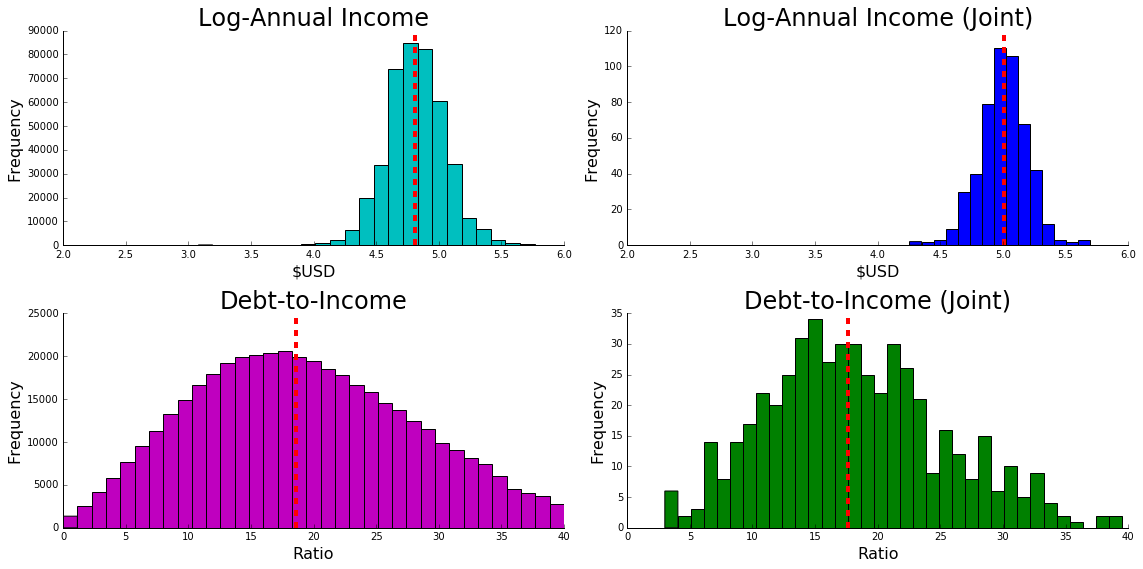

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
plt_hist(data.annual_inc, 100, 1000000, True, 25, "Log-Annual Income", ax[0][0], "Frequency", "$USD", 0)
plt_hist(data.annual_inc_joint, 100, 1000000, True, 15, "Log-Annual Income (Joint)", ax[0][1], "Frequency", "$USD", 1)
plt_hist(data.dti, 0, 40, False, 35, "Debt-to-Income", ax[1][0], "Frequency", "Ratio", 2)
plt_hist(data.dti_joint, 0, 40, False, 35, "Debt-to-Income (Joint)", ax[1][1], "Frequency", "Ratio", 3)
plt.tight_layout()
plt.show()

**<font size=6>Loan Terms</font>**

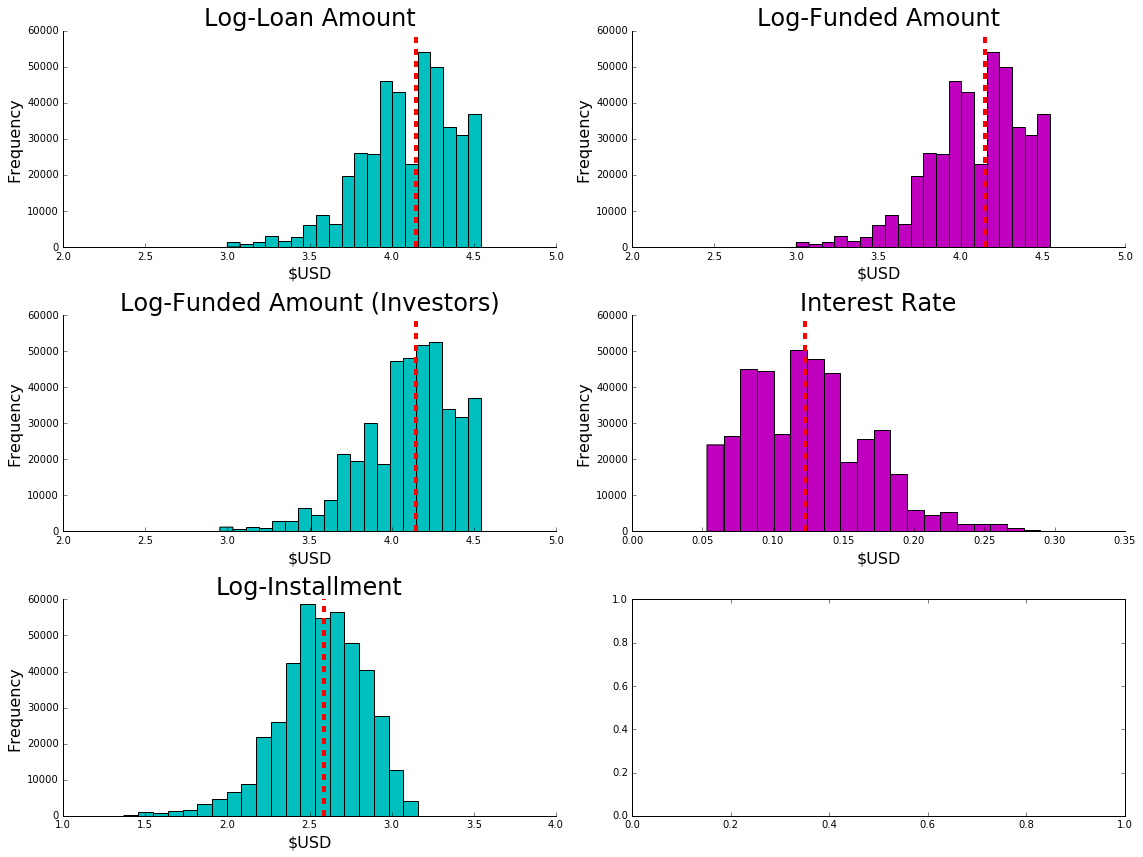

In [20]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
plt_hist(data.loan_amnt, 100, 100000, True, 20, "Log-Loan Amount", ax[0][0], "Frequency", "$USD", 0)
plt_hist(data.funded_amnt, 100, 100000, True, 20, "Log-Funded Amount", ax[0][1], "Frequency", "$USD", 2)
plt_hist(data.funded_amnt_inv, 100, 100000, True, 20, "Log-Funded Amount (Investors)", ax[1][0], "Frequency", "$USD", 0)
plt_hist(data.int_rate, 0, 0.35, False, 20, "Interest Rate", ax[1][1], "Frequency", "$USD", 2)
plt_hist(data.installment, 10, 10000, True, 20, "Log-Installment", ax[2][0], "Frequency", "$USD", 0)
plt.tight_layout()
plt.show()

**<font size=6>Repayments/Recoveries</font>**

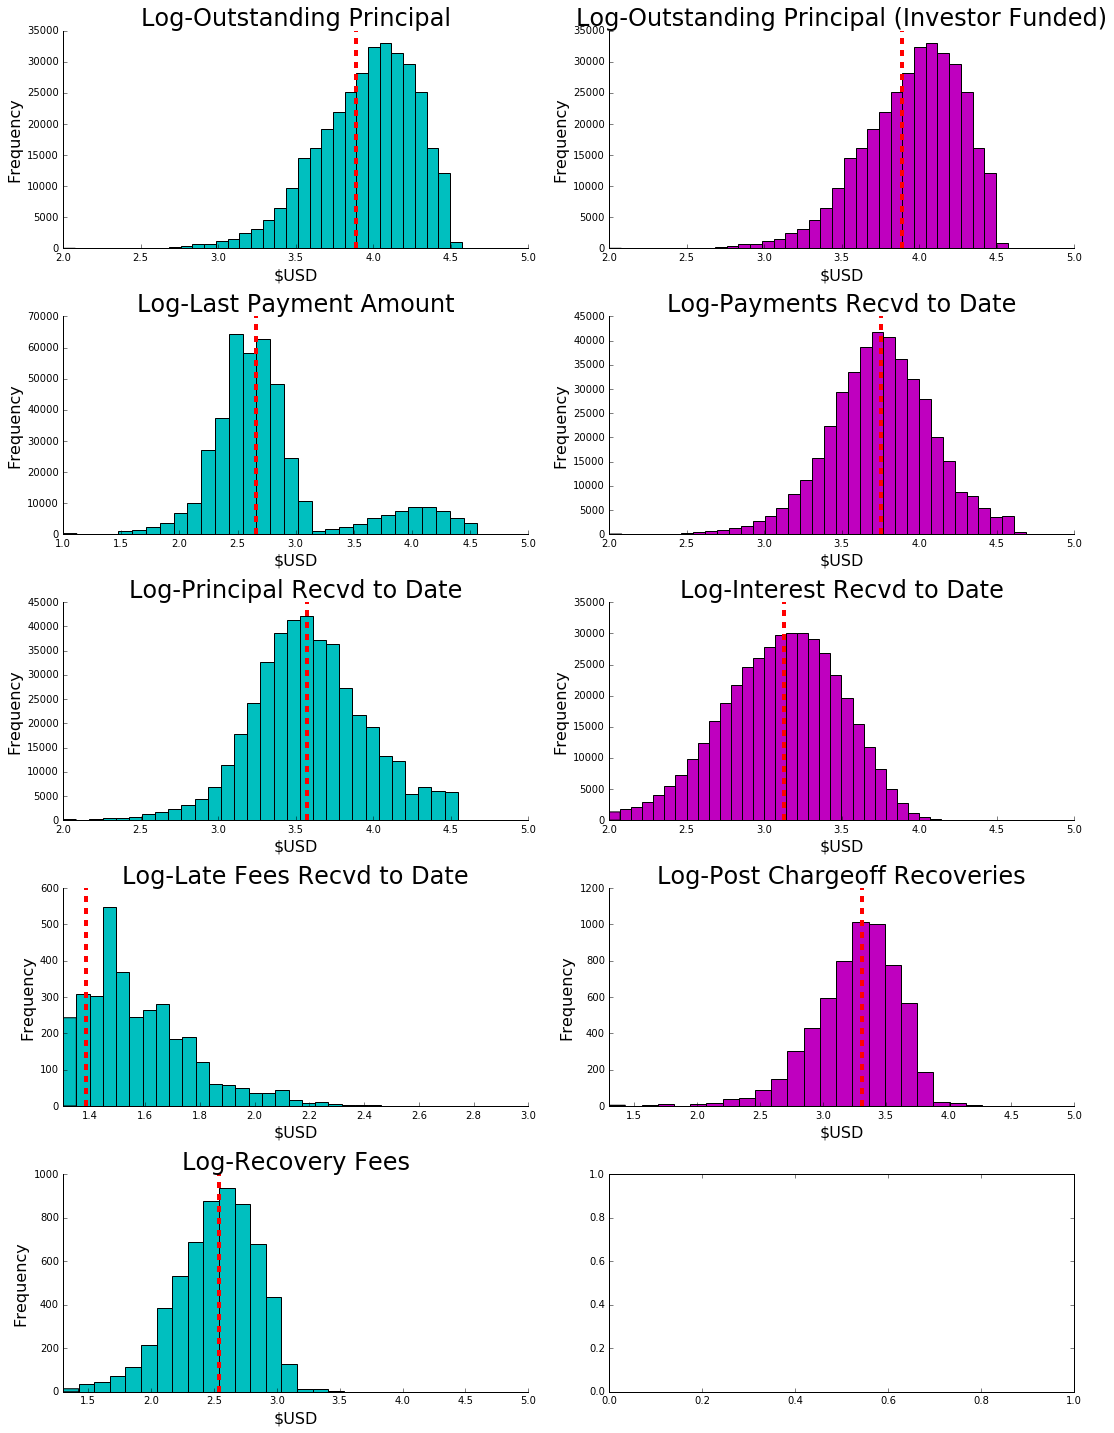

In [64]:
fig, ax = plt.subplots(5, 2, figsize=(16, 20))
plt_hist(data.out_prncp, 100, 100000, True, 35, "Log-Outstanding Principal", ax[0][0], "Frequency", "$USD", 0)
plt_hist(data.out_prncp_inv, 100, 100000, True, 35, "Log-Outstanding Principal (Investor Funded)", ax[0][1], "Frequency", "$USD", 2)
plt_hist(data.last_pymnt_amnt, 10, 100000, True, 30, "Log-Last Payment Amount", ax[1][0], "Frequency", "$USD", 0)
plt_hist(data.total_pymnt, 100, 100000, True, 35, "Log-Payments Recvd to Date", ax[1][1], "Frequency", "$USD", 2)
plt_hist(data.total_rec_prncp, 100, 100000, True, 30, "Log-Principal Recvd to Date", ax[2][0], "Frequency", "$USD", 0)
plt_hist(data.total_rec_int, 100, 100000, True, 30, "Log-Interest Recvd to Date", ax[2][1], "Frequency", "$USD", 2)
plt_hist(data.total_rec_late_fee[data.total_rec_late_fee>0], 20, 1000, True, 25, "Log-Late Fees Recvd to Date", ax[3][0], "Frequency", "$USD", 0)
plt_hist(data.recoveries[data.recoveries>0], 20, 100000, True, 25, "Log-Post Chargeoff Recoveries", ax[3][1], "Frequency", "$USD", 2)
plt_hist(data.collection_recovery_fee[data.collection_recovery_fee>0], 20, 100000, True, 20, "Log-Recovery Fees", ax[4][0], "Frequency", "$USD", 0)
plt.tight_layout()
plt.show()

**<font size=6>Credit Balances</font>**

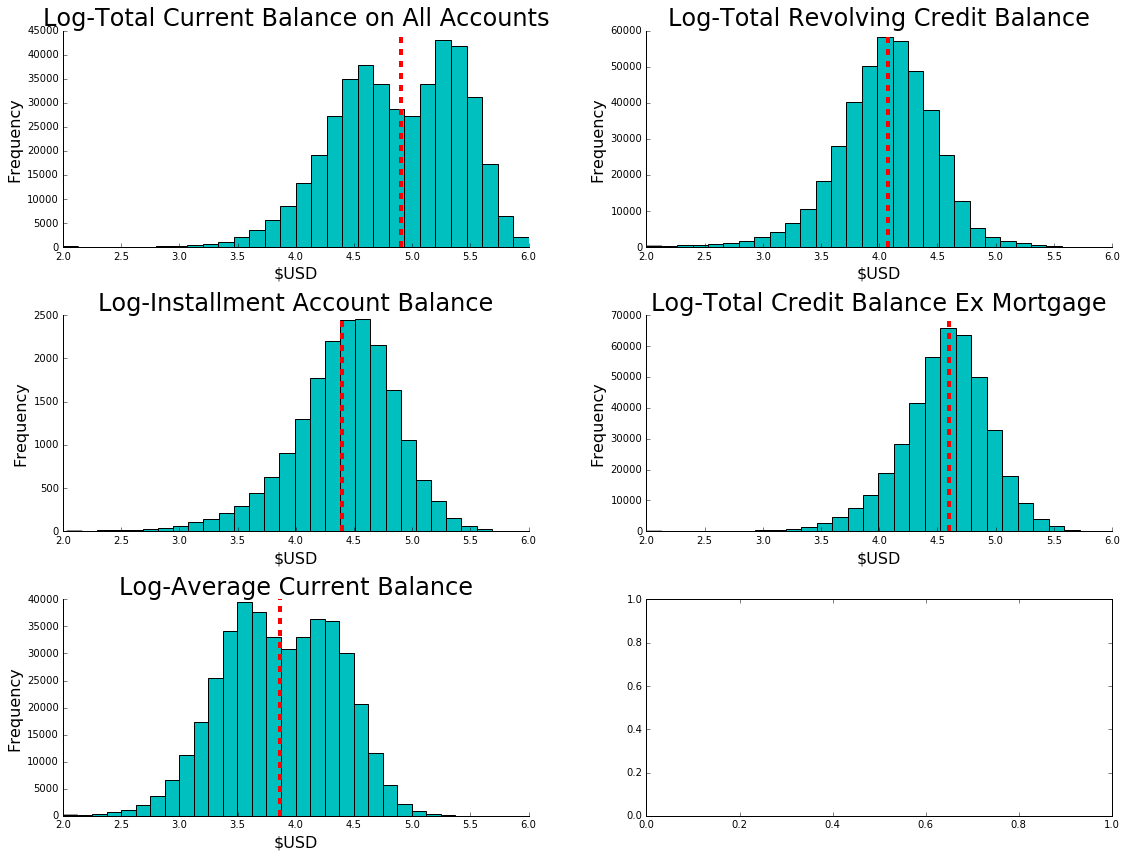

In [65]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
plt_hist(data.tot_cur_bal, 100, 1000000, True, 30, "Log-Total Current Balance on All Accounts", ax[0][0], "Frequency", "$USD", 0)
plt_hist(data.revol_bal, 100, 1000000, True, 30, "Log-Total Revolving Credit Balance", ax[0][1], "Frequency", "$USD", 0)
plt_hist(data.total_bal_il, 100, 1000000, True, 30, "Log-Installment Account Balance", ax[1][0], "Frequency", "$USD", 0)
plt_hist(data.total_bal_ex_mort, 100, 1000000, True, 30, "Log-Total Credit Balance Ex Mortgage", ax[1][1], "Frequency", "$USD", 0)
plt_hist(data.avg_cur_bal, 100, 1000000, True, 30, "Log-Average Current Balance", ax[2][0], "Frequency", "$USD", 0)
plt.tight_layout()
plt.show()

**<font size=6>Credit Limits</font>**

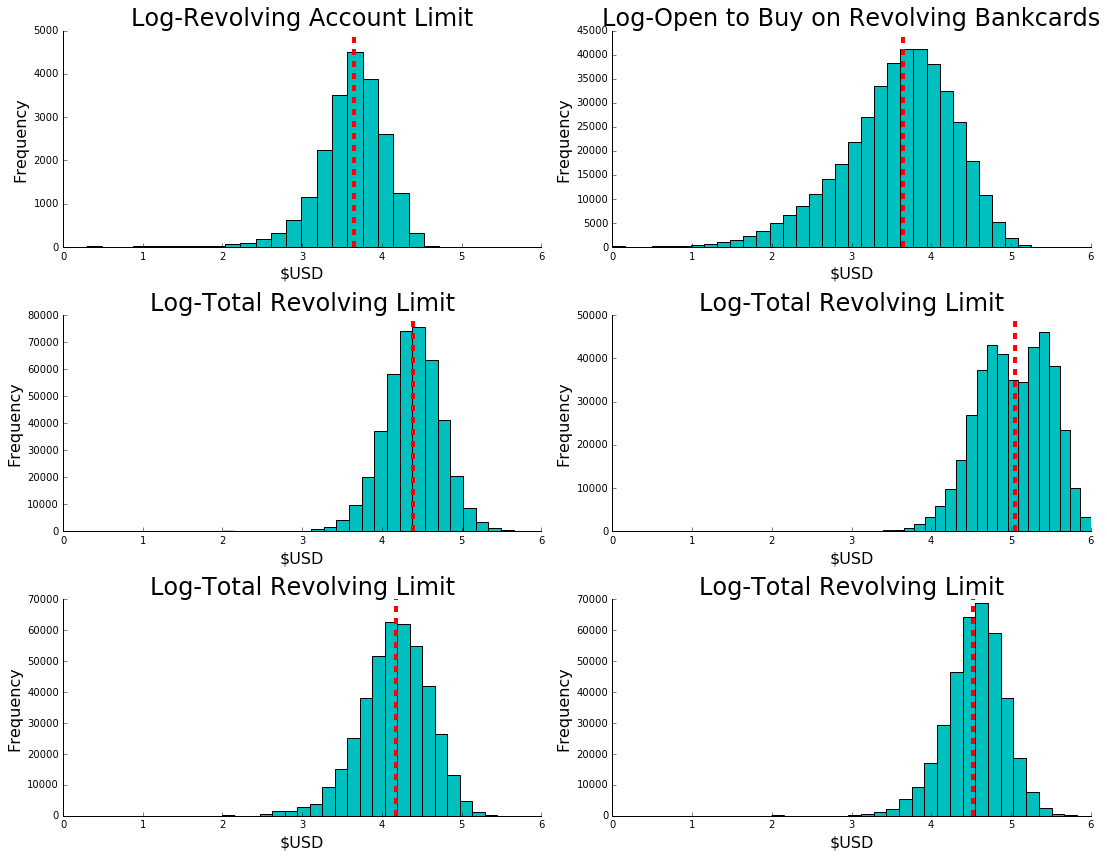

In [66]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
plt_hist(data.max_bal_bc, 1, 1000000, True, 25, "Log-Revolving Account Limit", ax[0][0], "Frequency", "$USD", 0)
plt_hist(data.bc_open_to_buy, 1, 1000000, True, 35, "Log-Open to Buy on Revolving Bankcards", ax[0][1], "Frequency", "$USD", 0)
plt_hist(data.total_rev_hi_lim, 1, 1000000, True, 25, "Log-Total Revolving Limit", ax[1][0], "Frequency", "$USD", 0)
plt_hist(data.tot_hi_cred_lim, 1, 1000000, True, 20, "Log-Total Revolving Limit", ax[1][1], "Frequency", "$USD", 0)
plt_hist(data.total_bc_limit, 1, 1000000, True, 25, "Log-Total Revolving Limit", ax[2][0], "Frequency", "$USD", 0)
plt_hist(data.total_il_high_credit_limit, 1, 1000000, True, 25, "Log-Total Revolving Limit", ax[2][1], "Frequency", "$USD", 0)
plt.tight_layout()
plt.show()

**<font size=6>Credit Utilization</font>**

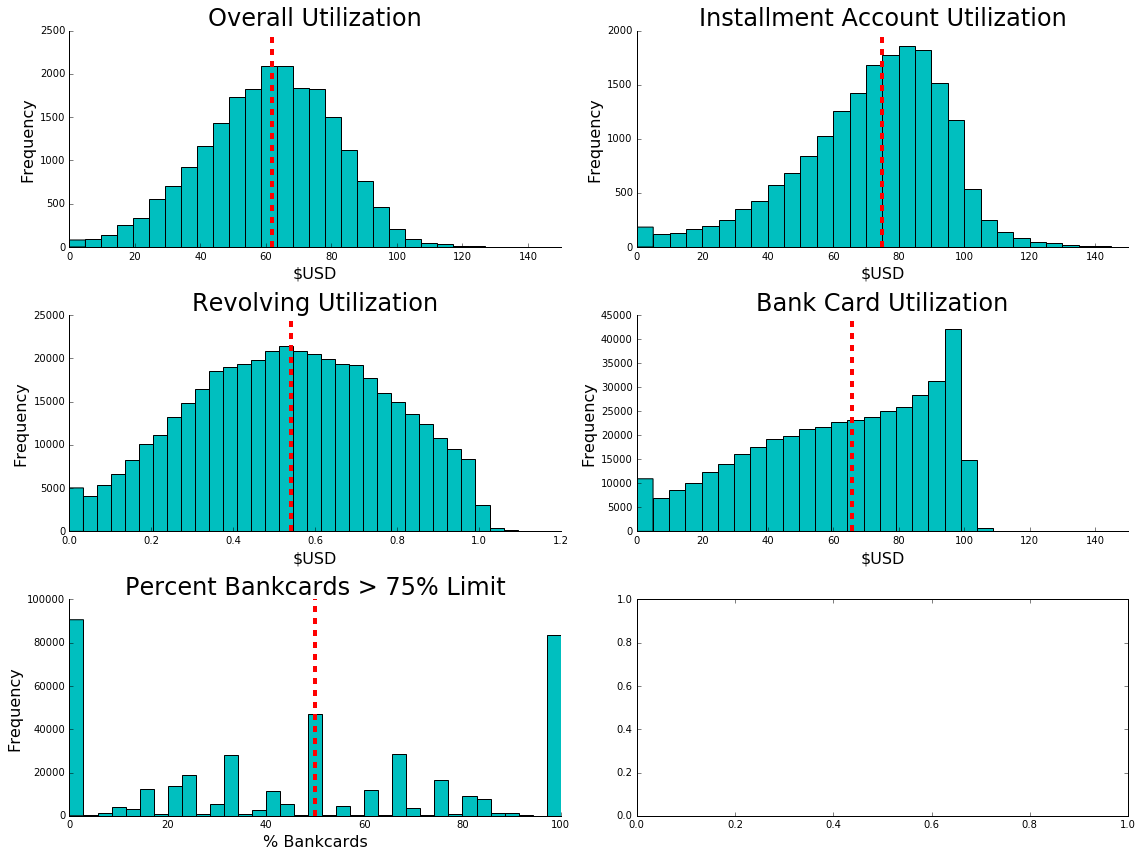

In [67]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
plt_hist(data.all_util, 0, 150, False, 30, "Overall Utilization", ax[0][0], "Frequency", "$USD", 0)
plt_hist(data.il_util, 0, 150, False, 30, "Installment Account Utilization", ax[0][1], "Frequency", "$USD", 0)
plt_hist(data.revol_util, 0, 1.2, False, 35, "Revolving Utilization", ax[1][0], "Frequency", "$USD", 0)
plt_hist(data.bc_util, 0, 150, False, 30, "Bank Card Utilization", ax[1][1], "Frequency", "$USD", 0)
plt_hist(data.percent_bc_gt_75, 0, 100, False, 35, "Percent Bankcards > 75% Limit", ax[2][0], "Frequency", "% Bankcards", 0)
plt.tight_layout()
plt.show()

**<font size=6>Number of Accounts</font>**

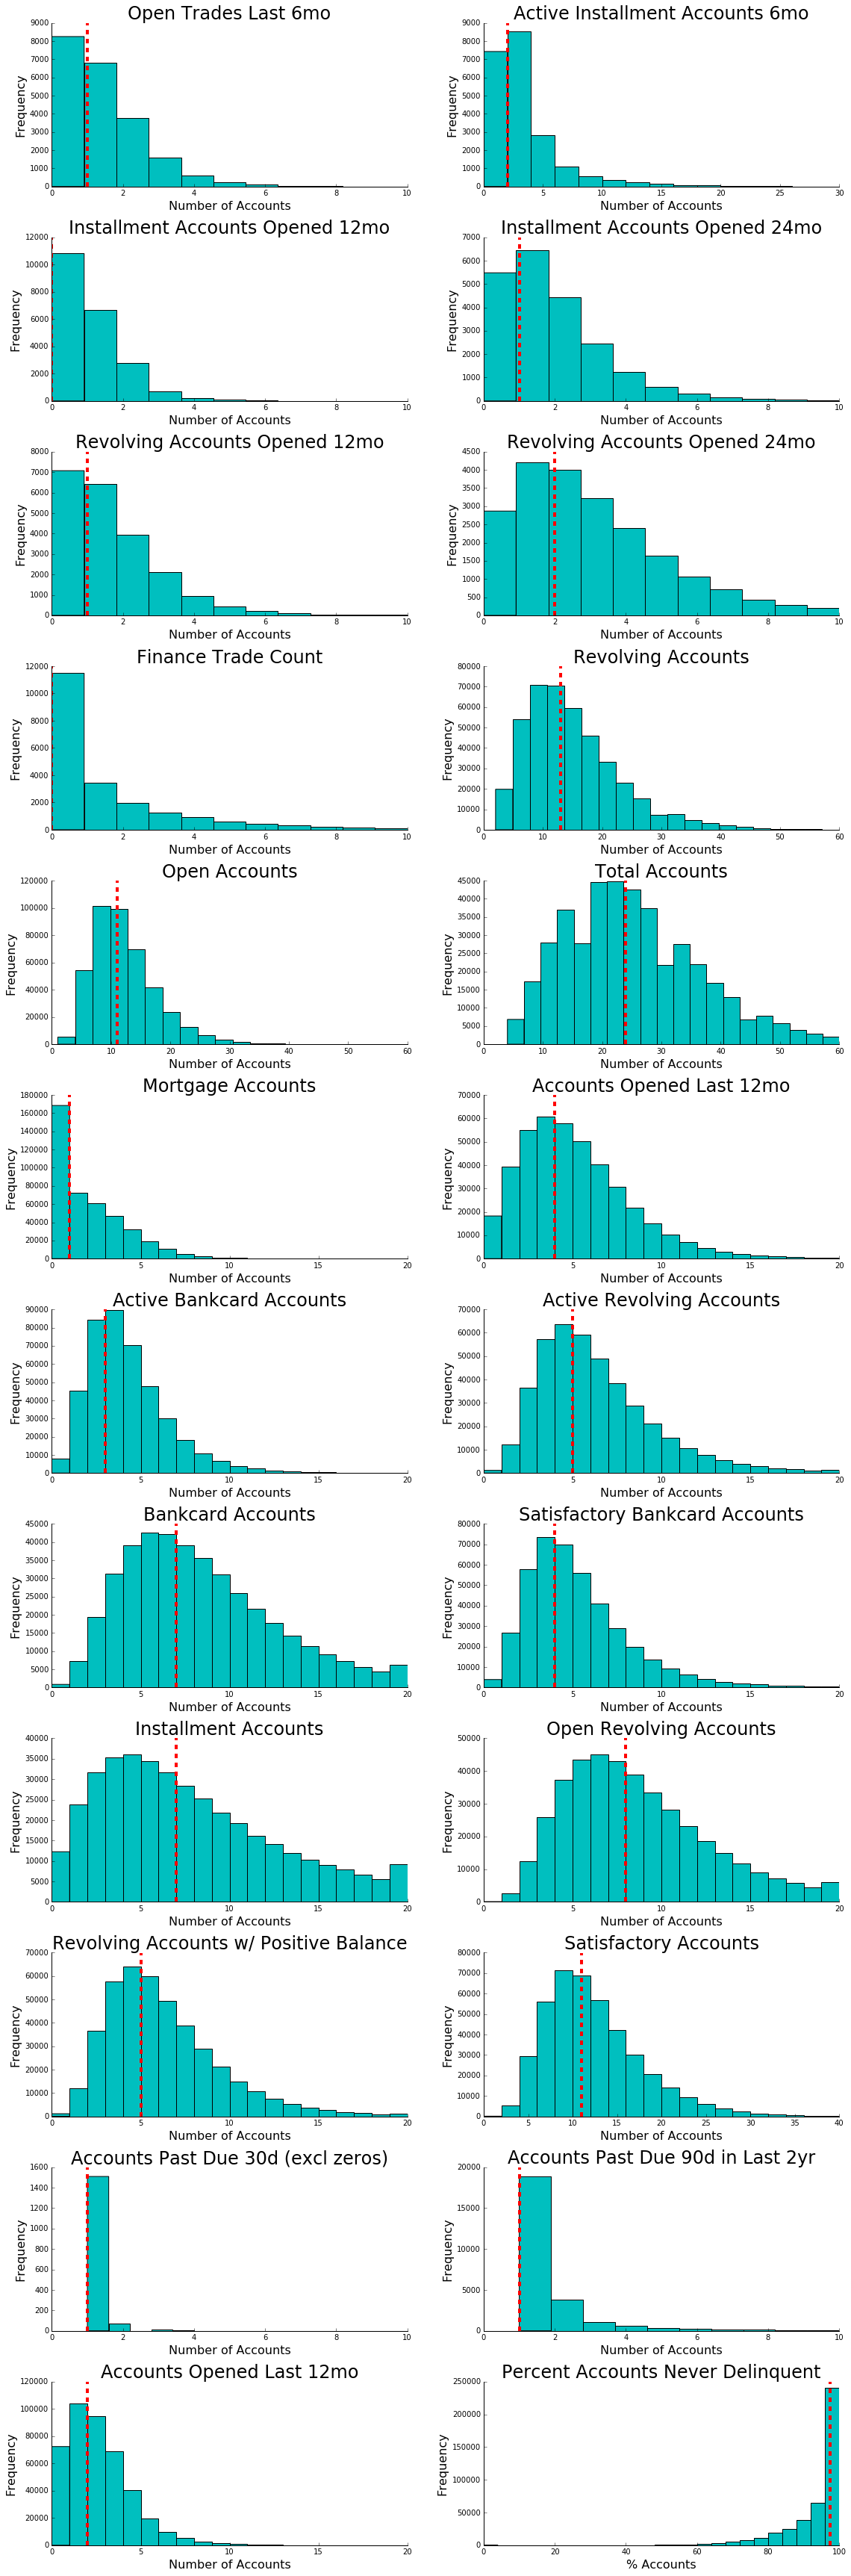

In [68]:
fig, ax = plt.subplots(12, 2, figsize=(16, 48))
plt_hist(data.open_acc_6m, 0, 10, False, 11, "Open Trades Last 6mo", ax[0, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.open_il_6m, 0, 30, False, 15, "Active Installment Accounts 6mo", ax[0, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.open_il_12m, 0, 10, False, 11, "Installment Accounts Opened 12mo", ax[1, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.open_il_24m, 0, 10, False, 11, "Installment Accounts Opened 24mo", ax[1, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.open_rv_12m, 0, 10, False, 11, "Revolving Accounts Opened 12mo", ax[2, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.open_rv_24m, 0, 10, False, 11, "Revolving Accounts Opened 24mo", ax[2, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.total_cu_tl, 0, 10, False, 11, "Finance Trade Count", ax[3, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_rev_accts, 0, 60, False, 20, "Revolving Accounts", ax[3, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.open_acc, 0, 60, False, 20, "Open Accounts", ax[4, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.total_acc, 0, 60, False, 20, "Total Accounts", ax[4, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.mort_acc, 0, 20, False, 20, "Mortgage Accounts", ax[5, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.acc_open_past_24mths, 0, 20, False, 20, "Accounts Opened Last 12mo", ax[5, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_actv_bc_tl, 0, 20, False, 20, "Active Bankcard Accounts", ax[6, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_actv_rev_tl, 0, 20, False, 20, "Active Revolving Accounts", ax[6, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_bc_tl, 0, 20, False, 20, "Bankcard Accounts", ax[7, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_bc_sats, 0, 20, False, 20, "Satisfactory Bankcard Accounts", ax[7, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_il_tl, 0, 20, False, 20, "Installment Accounts", ax[8, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_op_rev_tl, 0, 20, False, 20, "Open Revolving Accounts", ax[8, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_rev_tl_bal_gt_0, 0, 20, False, 20, "Revolving Accounts w/ Positive Balance", ax[9, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_sats, 0, 40, False, 20, "Satisfactory Accounts", ax[9, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_tl_30dpd[data.num_tl_30dpd>0], 0, 10, False, 5, "Accounts Past Due 30d (excl zeros)", ax[10, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_tl_90g_dpd_24m[data.num_tl_90g_dpd_24m>0], 0, 10, False, 10, "Accounts Past Due 90d in Last 2yr", ax[10, 1], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_tl_op_past_12m, 0, 20, False, 20, "Accounts Opened Last 12mo", ax[11, 0], "Frequency", "Number of Accounts", 0)
plt_hist(data.pct_tl_nvr_dlq, 0, 100, False, 25, "Percent Accounts Never Delinquent", ax[11, 1], "Frequency", "% Accounts", 0)
plt.tight_layout()
plt.show()

**<font size=6>Derogatory Marks</font>**

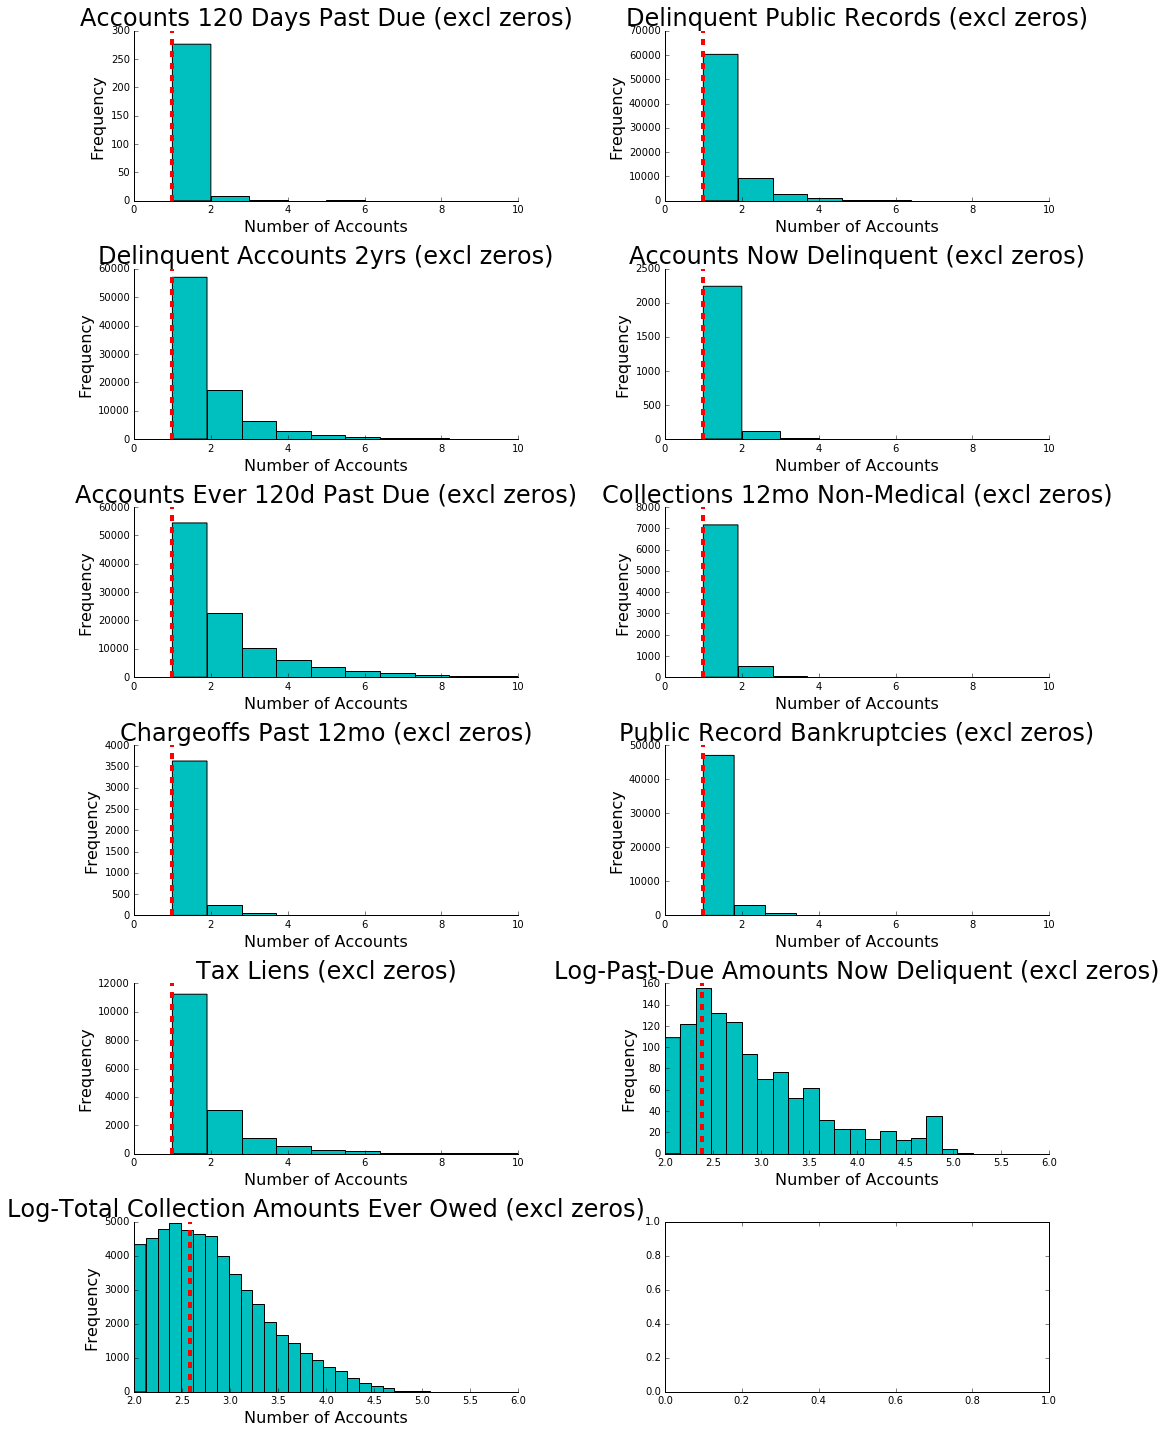

In [69]:
fig, ax = plt.subplots(6, 2, figsize=(16, 20))
plt_hist(data.num_tl_120dpd_2m[data.num_tl_120dpd_2m>0], 0, 10, False, 5, "Accounts 120 Days Past Due (excl zeros)", ax[0][0], "Frequency", "Number of Accounts", 0)
plt_hist(data.pub_rec[data.pub_rec>0], 0, 10, False, 10, "Delinquent Public Records (excl zeros)", ax[0][1], "Frequency", "Number of Accounts", 0)
plt_hist(data.delinq_2yrs[data.delinq_2yrs>0], 0, 10, False, 10, "Delinquent Accounts 2yrs (excl zeros)", ax[1][0], "Frequency", "Number of Accounts", 0)
plt_hist(data.acc_now_delinq[data.acc_now_delinq>0], 0, 10, False, 5, "Accounts Now Delinquent (excl zeros)", ax[1][1], "Frequency", "Number of Accounts", 0)
plt_hist(data.num_accts_ever_120_pd[data.num_accts_ever_120_pd>0], 0, 10, False, 10, "Accounts Ever 120d Past Due (excl zeros)", ax[2][0], "Frequency", "Number of Accounts", 0)
plt_hist(data.collections_12_mths_ex_med[data.collections_12_mths_ex_med>0], 0, 10, False, 10, "Collections 12mo Non-Medical (excl zeros)", ax[2][1], "Frequency", "Number of Accounts", 0)
plt_hist(data.chargeoff_within_12_mths[data.chargeoff_within_12_mths>0], 0, 10, False, 10, "Chargeoffs Past 12mo (excl zeros)", ax[3][0], "Frequency", "Number of Accounts", 0)
plt_hist(data.pub_rec_bankruptcies[data.pub_rec_bankruptcies>0], 0, 10, False, 10, "Public Record Bankruptcies (excl zeros)", ax[3][1], "Frequency", "Number of Accounts", 0)
plt_hist(data.tax_liens[data.tax_liens>0], 0, 10, False, 10, "Tax Liens (excl zeros)", ax[4][0], "Frequency", "Number of Accounts", 0)
plt_hist(data.delinq_amnt[data.delinq_amnt>0], 100, 1000000, True, 20, "Log-Past-Due Amounts Now Deliquent (excl zeros)", ax[4][1], "Frequency", "Number of Accounts", 0)
plt_hist(data.tot_coll_amt[data.tot_coll_amt>0], 100, 1000000, True, 30, "Log-Total Collection Amounts Ever Owed (excl zeros)", ax[5][0], "Frequency", "Number of Accounts", 0)
plt.tight_layout()
plt.show()

**<font size=6>Credit Inquiries</font>**

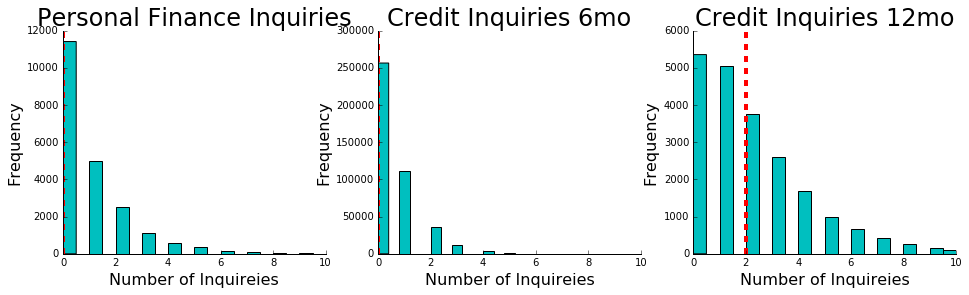

In [70]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
plt_hist(data.inq_fi, 0, 10, False, 20, "Personal Finance Inquiries", ax[0], "Frequency", "Number of Inquireies", 0)
plt_hist(data.inq_last_6mths, 0, 10, False, 15, "Credit Inquiries 6mo", ax[1], "Frequency", "Number of Inquireies", 0)
plt_hist(data.inq_last_12m, 0, 10, False, 20, "Credit Inquiries 12mo", ax[2], "Frequency", "Number of Inquireies", 0)
plt.show()

**<font size=6>Months Since</font>**

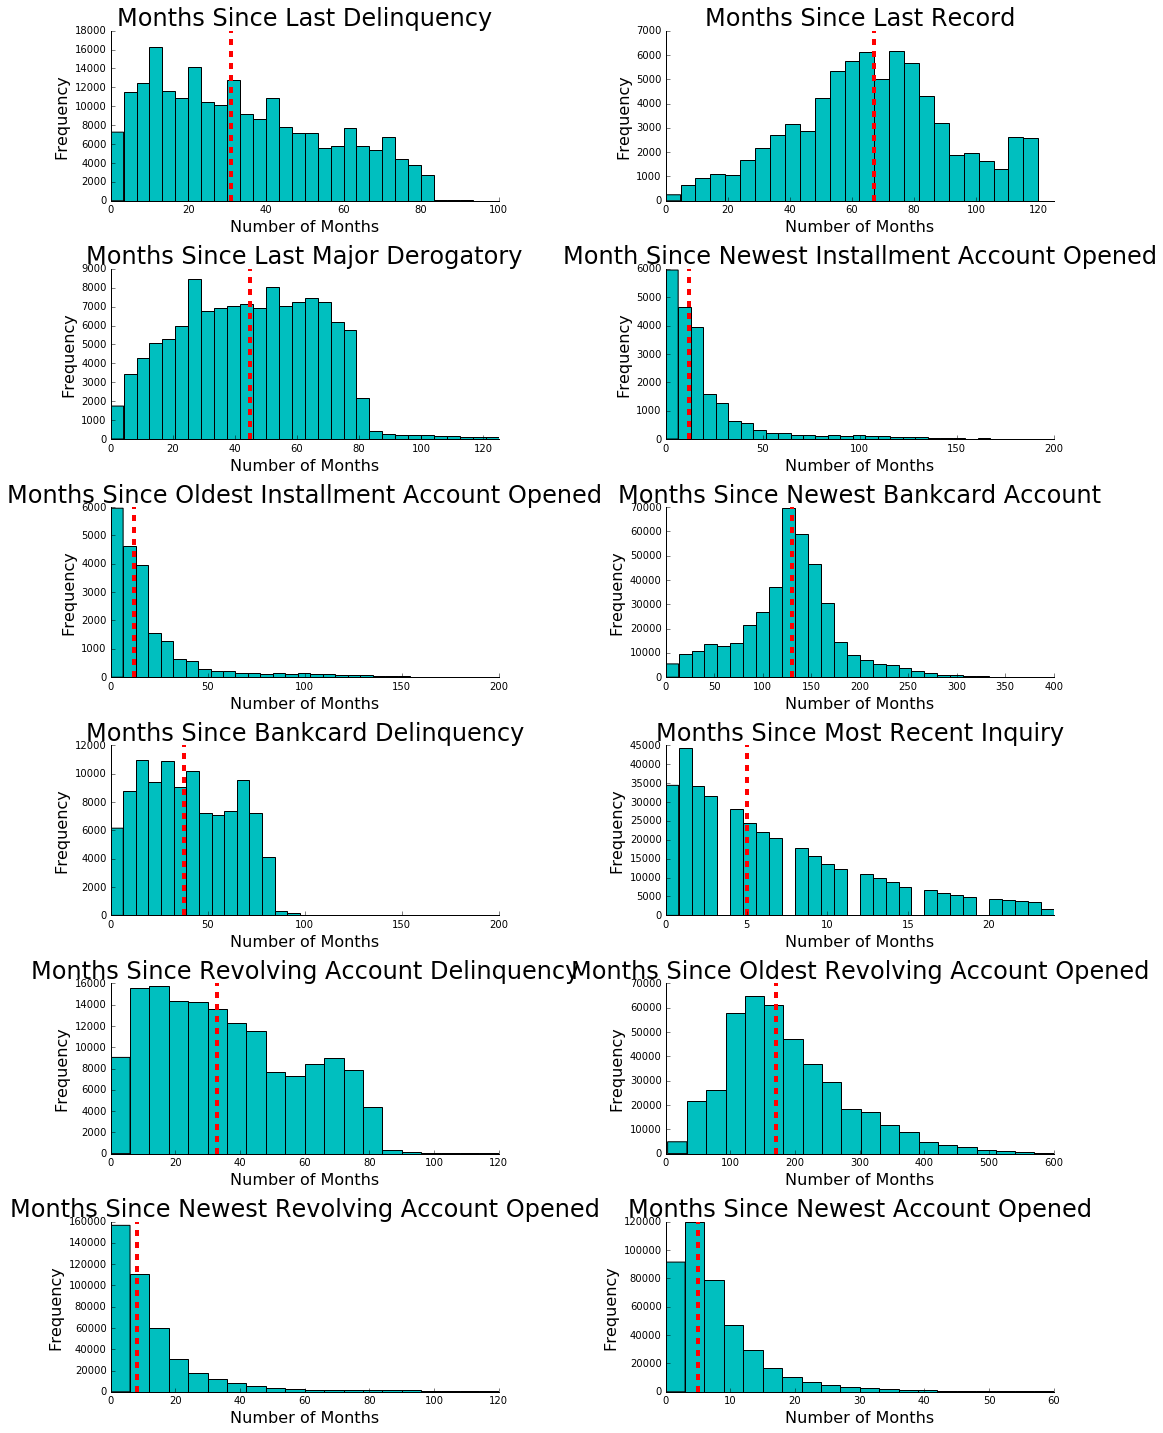

In [71]:
fig, ax = plt.subplots(6, 2, figsize=(16, 20))
plt_hist(data.mths_since_last_delinq, 0, 100, False, 30, "Months Since Last Delinquency", ax[0][0], "Frequency", "Number of Months", 0)
plt_hist(data.mths_since_last_record, 0, 125, False, 25, "Months Since Last Record", ax[0][1], "Frequency", "Number of Months", 0)
plt_hist(data.mths_since_last_major_derog, 0, 125, False, 30, "Months Since Last Major Derogatory", ax[1][0], "Frequency", "Number of Months", 0)
plt_hist(data.mths_since_rcnt_il, 0, 200, False, 30, "Month Since Newest Installment Account Opened", ax[1][1], "Frequency", "Number of Months", 0)
plt_hist(data.mths_since_rcnt_il, 0, 200, False, 30, "Months Since Oldest Installment Account Opened", ax[2][0], "Frequency", "Number of Months", 0)
plt_hist(data.mo_sin_old_il_acct, 0, 400, False, 30, "Months Since Newest Bankcard Account", ax[2][1], "Frequency", "Number of Months", 0)
plt_hist(data.mths_since_recent_bc_dlq, 0, 200, False, 30, "Months Since Bankcard Delinquency", ax[3][0], "Frequency", "Number of Months", 0)
plt_hist(data.mths_since_recent_inq, 0, 24, False, 30, "Months Since Most Recent Inquiry", ax[3][1], "Frequency", "Number of Months", 0)
plt_hist(data.mths_since_recent_revol_delinq, 0, 120, False, 20, "Months Since Revolving Account Delinquency", ax[4][0], "Frequency", "Number of Months", 0)
plt_hist(data.mo_sin_old_rev_tl_op, 0, 600, False, 20, "Months Since Oldest Revolving Account Opened", ax[4][1], "Frequency", "Number of Months", 0)
plt_hist(data.mo_sin_rcnt_rev_tl_op, 0, 120, False, 20, "Months Since Newest Revolving Account Opened", ax[5][0], "Frequency", "Number of Months", 0)
plt_hist(data.mo_sin_rcnt_tl, 0, 60, False, 20, "Months Since Newest Account Opened", ax[5][1], "Frequency", "Number of Months", 0)
plt.tight_layout()
plt.show()

**<font size=6>State Wise Distribution</font>**

In [72]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
state_codes = dict ( (v,k) for k, v in us_state_abbrev.items() )

In [73]:
def normalize(d, target=1.0):
    x = np.array(d.values())
    where_are_NaNs = np.isnan(x)
    x[where_are_NaNs] = 0
    sort = np.argsort(x)
    sort = sort[x[sort] != 0]
    min = x[sort[0]]
    x = x-min
    raw = np.max(x)
    factor = float(target)/raw
    return {key:value*factor for key,value in d.iteritems()}

In [74]:
def plot_state_wise_data(var, title):
    
#     Showing colorbar is nightmare on axes , cant resolve it now.
    fig = plt.figure(figsize=(30,5)); 
    ax = fig.add_subplot(1,1,1); 

    var = normalize(var)
    # create the map
    map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # load the shapefile, use the name 'states'
    map.readshapefile('./shape/st99_d00', name='states', drawbounds=True)

    state_names = []
    for shape_dict in map.states_info:
        state_names.append(shape_dict['NAME'])

    Blues = plt.get_cmap('Reds')
    
    for idx, state in enumerate(state_names):
        name = state

        value = 0
        if (us_state_abbrev.has_key(name)):
            code = us_state_abbrev[name]
            if var.has_key(code):
                value = var[code]
#         print state + str(value) + "    -----------      " + str(Blues(value))
        seg = map.states[idx]
        col = np.array(Blues(value))
        poly = Polygon(seg, facecolor = col, edgecolor='none')
        cax = ax.add_patch(poly)
        
#     lons, lats = map.makegrid(0 , len(var))
#     xi, yi = map(lons, lats)
#     cs = map.pcolor(xi, yi, var)
#     ax.pcolor(var)
#     map.colorbar(cs)
#     plt.colorbar(cax)
    plt.title(title)
    plt.show()
    return ax


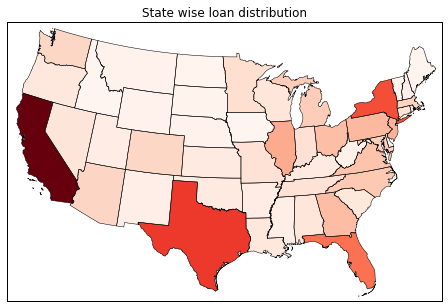

In [43]:
state_loan = data.groupby("addr_state").loan_amnt.sum().to_dict()
plot_state_wise_data(state_loan, "State wise loan distribution")

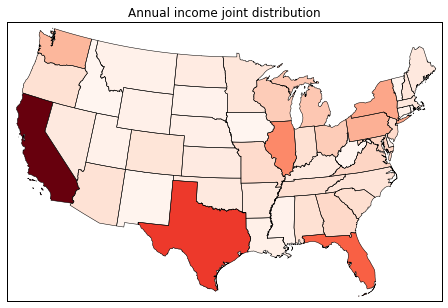

In [44]:
annual_inc_joint = data.groupby("addr_state").annual_inc_joint.sum().to_dict()
plot_state_wise_data(annual_inc_joint, "Annual income joint distribution")

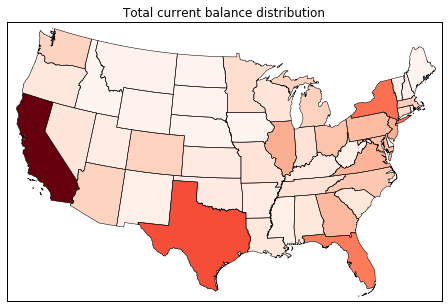

In [45]:
tot_cur_bal = data.groupby("addr_state").tot_cur_bal.sum().to_dict()
plot_state_wise_data(tot_cur_bal, "Total current balance distribution")

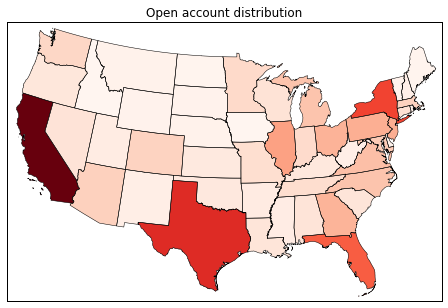

In [46]:
total_acc = data.groupby("addr_state").total_acc.sum().to_dict()
plot_state_wise_data(total_acc, "Open account distribution")

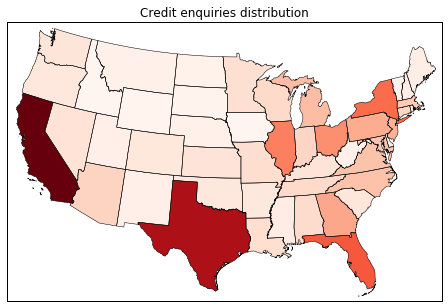

In [47]:
inq_fi = data.groupby("addr_state").inq_fi.sum().to_dict()
plot_state_wise_data(inq_fi, "Credit enquiries distribution")

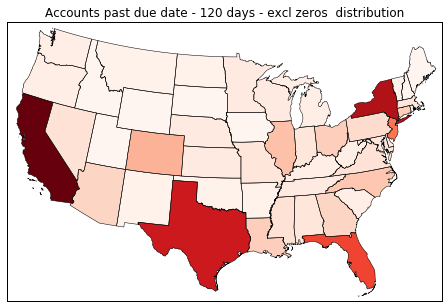

In [48]:
df = data[data.num_tl_120dpd_2m>0]
num_tl_120dpd = df.groupby("addr_state").num_tl_120dpd_2m.sum().to_dict()
plot_state_wise_data(num_tl_120dpd, "Accounts past due date - 120 days - excl zeros  distribution")

**<font size=6>Correlation Heatmaps</font>**

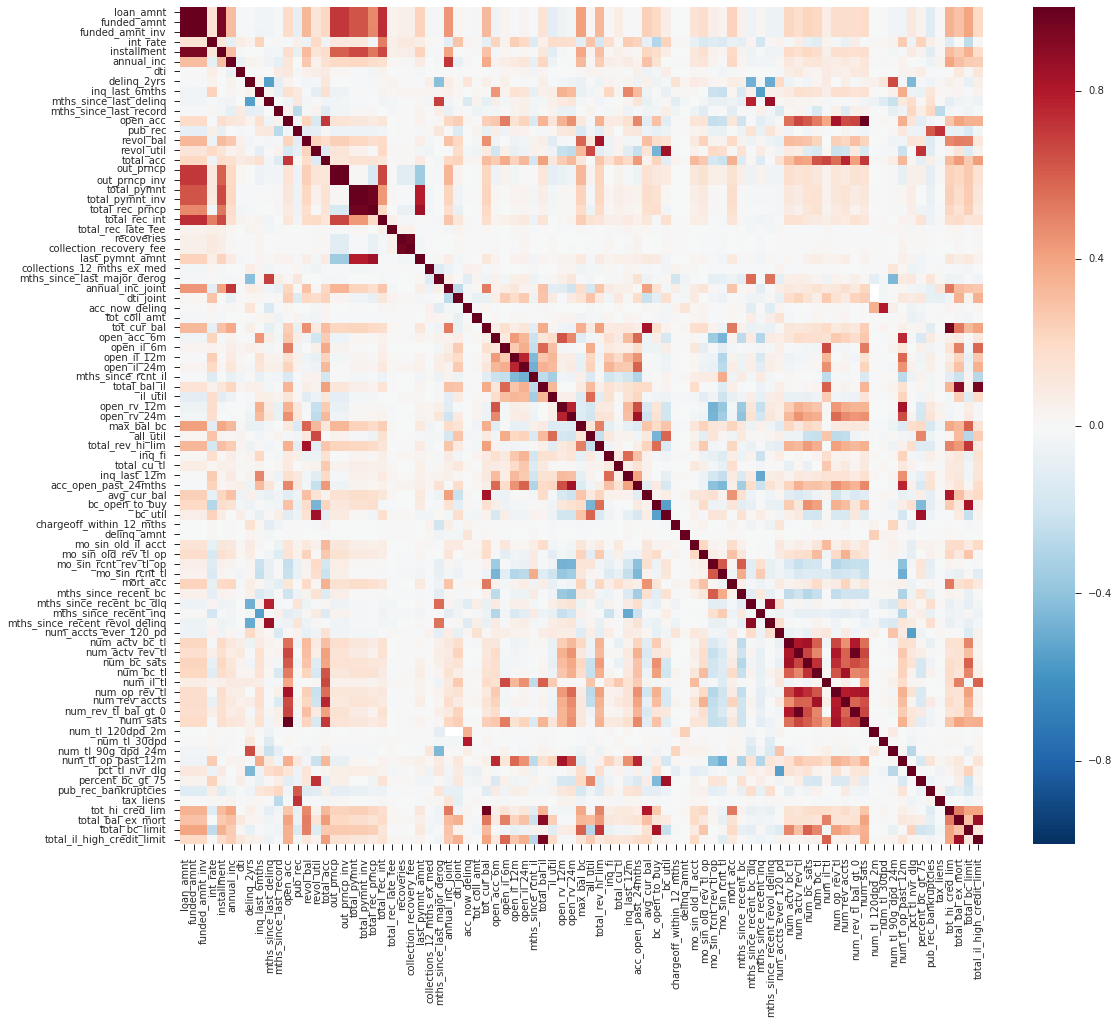

In [231]:
import seaborn as sns
corr_df = data.corr()
plt.figure(figsize=[18,15])
sns.heatmap(corr_df)

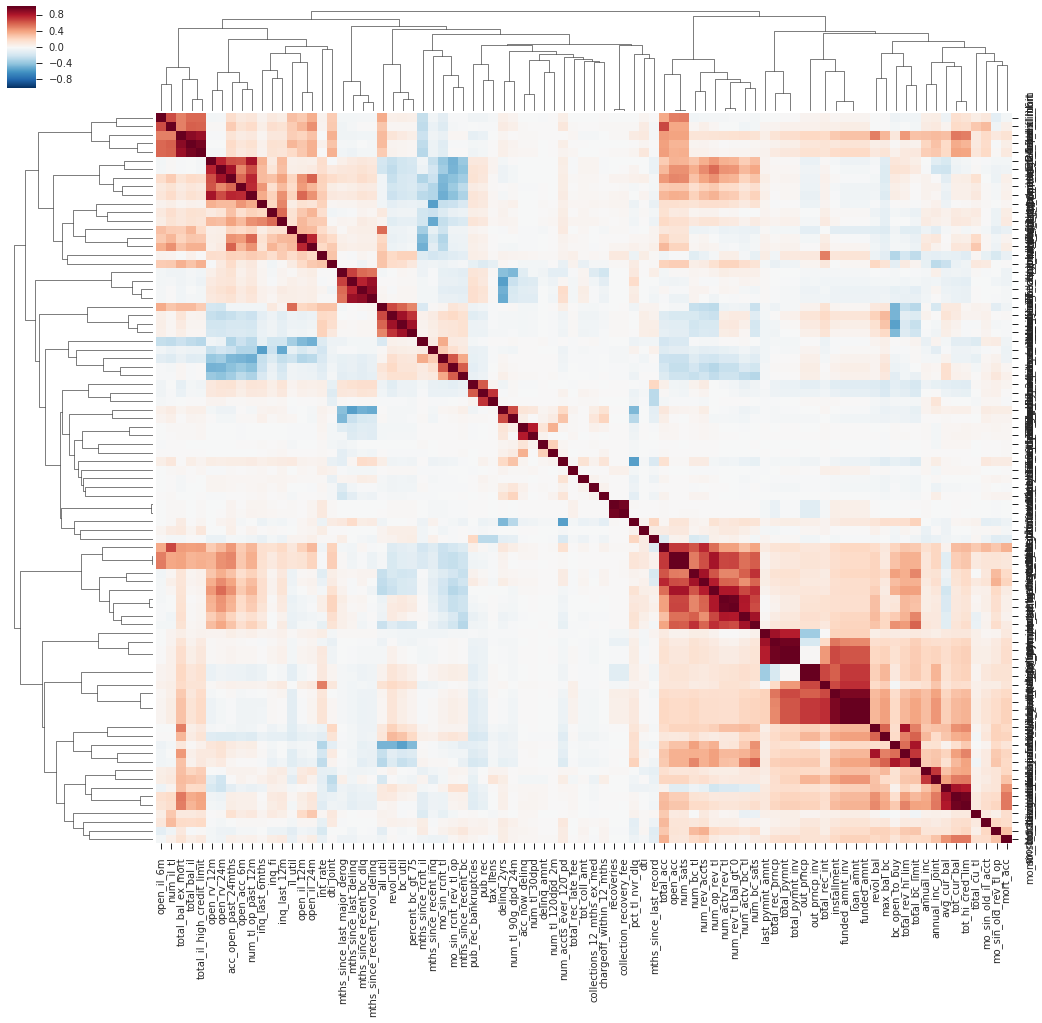

In [233]:
df = corr_df.fillna(0)
g = sns.clustermap(df, figsize=(18,15))

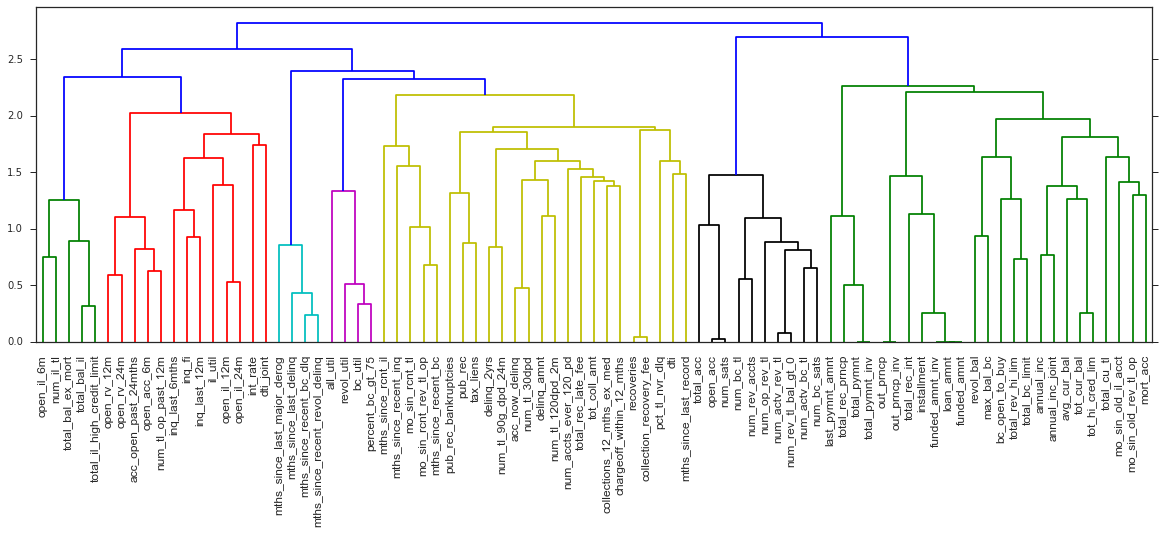

In [288]:
plt.figure(figsize=(20,6))
den = scipy.cluster.hierarchy.dendrogram(g.dendrogram_col.linkage,
                                         labels = df.index,
                                         color_threshold=2.3,
                                         leaf_font_size=12)

In [278]:
import scipy.cluster.hierarchy as sch
ind = sch.fcluster(g.dendrogram_col.linkage, 2.3, 'distance')
corr_df["cluster"] = ind

In [279]:
print corr_df["cluster"]

loan_amnt                         7
funded_amnt                       7
funded_amnt_inv                   7
int_rate                          2
installment                       7
annual_inc                        7
dti                               5
delinq_2yrs                       5
inq_last_6mths                    2
mths_since_last_delinq            3
mths_since_last_record            5
open_acc                          6
pub_rec                           5
revol_bal                         7
revol_util                        4
total_acc                         6
out_prncp                         7
out_prncp_inv                     7
total_pymnt                       7
total_pymnt_inv                   7
total_rec_prncp                   7
total_rec_int                     7
total_rec_late_fee                5
recoveries                        5
collection_recovery_fee           5
last_pymnt_amnt                   7
collections_12_mths_ex_med        5
mths_since_last_major_derog 

In [238]:
clusters

{'b': ['open_il_6m',
  'num_il_tl',
  'total_bal_ex_mort',
  'open_acc_6m',
  'num_tl_op_past_12m',
  'acc_open_past_24mths',
  'inq_fi',
  'inq_last_12m',
  'inq_last_6mths',
  'il_util',
  'int_rate',
  'dti_joint',
  'mths_since_last_major_derog',
  'all_util',
  'mo_sin_rcnt_rev_tl_op',
  'mths_since_recent_bc',
  'mo_sin_rcnt_tl',
  'mths_since_recent_inq',
  'mths_since_rcnt_il',
  'pub_rec',
  'tax_liens',
  'pub_rec_bankruptcies',
  'delinq_2yrs',
  'num_tl_90g_dpd_24m',
  'delinq_amnt',
  'num_tl_120dpd_2m',
  'collections_12_mths_ex_med',
  'chargeoff_within_12_mths',
  'tot_coll_amt',
  'total_rec_late_fee',
  'num_accts_ever_120_pd',
  'dti',
  'mths_since_last_record',
  'pct_tl_nvr_dlq',
  'total_acc',
  'num_actv_bc_tl',
  'num_bc_sats',
  'num_op_rev_tl',
  'last_pymnt_amnt',
  'total_rec_int',
  'revol_bal',
  'max_bal_bc',
  'total_rev_hi_lim',
  'total_bc_limit',
  'bc_open_to_buy',
  'annual_inc',
  'annual_inc_joint',
  'avg_cur_bal',
  'mo_sin_old_rev_tl_op',
  'm

In [223]:
corr_mat

array([[ 1.        ,  1.        ,  0.99999449, ...,  0.28956492,
         0.39584277,  0.20309328],
       [ 1.        ,  1.        ,  0.99999449, ...,  0.28956492,
         0.39584277,  0.20309328],
       [ 0.99999449,  0.99999449,  1.        , ...,  0.28955365,
         0.39597271,  0.20308479],
       ..., 
       [ 0.28956492,  0.28956492,  0.28955365, ...,  1.        ,
         0.29452277,  0.86451723],
       [ 0.39584277,  0.39584277,  0.39597271, ...,  0.29452277,
         1.        ,  0.10298661],
       [ 0.20309328,  0.20309328,  0.20308479, ...,  0.86451723,
         0.10298661,  1.        ]])

**<font size=6>Boxplots</font>**

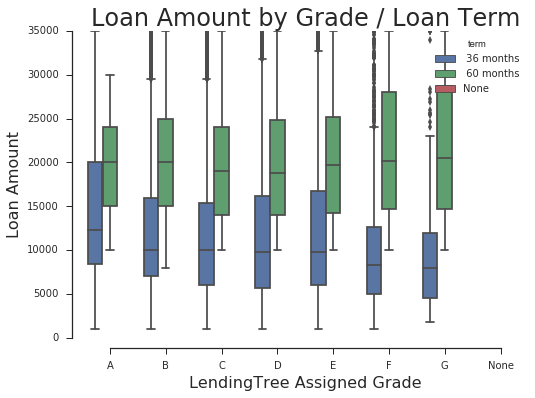

In [166]:
import seaborn as sns
sns.boxplot(x="grade", y="loan_amnt", hue="term", data=data)
ax = plt.gca()
ax.set_title("Loan Amount by Grade / Loan Term", fontsize=24)
ax.set_xlabel("LendingTree Assigned Grade", fontsize = 16)
ax.set_ylabel("Loan Amount", fontsize = 16)  
sns.despine(offset=10, trim=True)

In [157]:
def reject_outliers(df, col_name, m=2):
    """ Returns data frame without outliers in the col_name column """
    df_ = df[-np.isnan(df[col_name])]
    return df_[np.abs(df_[col_name] - df_[col_name].mean()) < m * df_[col_name].std()]

def boxplot_by_grade(ax, bp_title, y_col, y_label, reject_m=2):
    sns.boxplot(ax=ax, x="grade", y=y_col, data=reject_outliers(data, y_col, reject_m))
    sns.despine(offset=10, trim=True)
    ax.set_title(bp_title, fontsize=24)
    ax.set_xlabel("LendingTree Assigned Grade", fontsize = 16)
    ax.set_ylabel(y_label, fontsize = 16)  

    # Remove the plot frame lines. They are unnecessary chartjunk.  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  

    # Ensure that the axis ticks only show up on the bottom and left of the plot.  
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.  
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()  

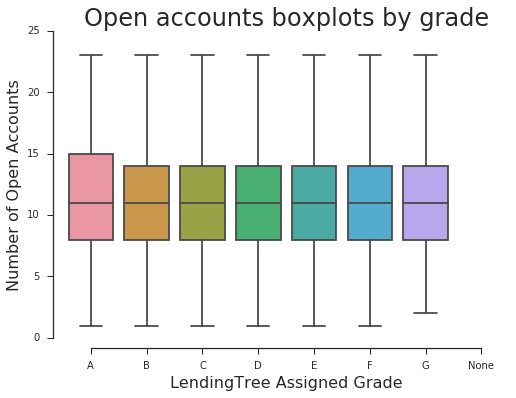

In [158]:
boxplot_by_grade(plt.gca(), bp_title="Open accounts boxplots by grade", y_col="open_acc", y_label="Number of Open Accounts")

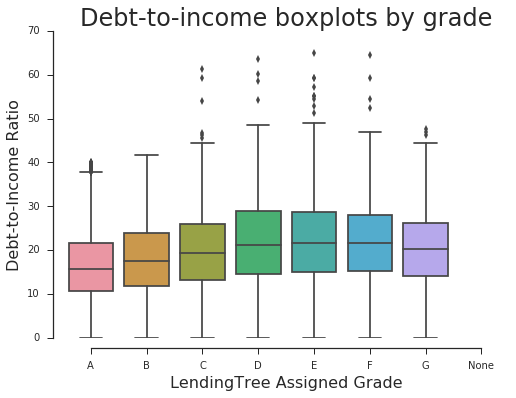

In [159]:
boxplot_by_grade(plt.gca(), bp_title="Debt-to-income boxplots by grade", y_col="dti", y_label="Debt-to-Income Ratio")

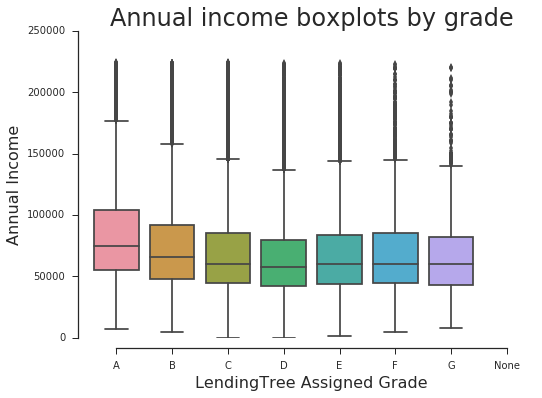

In [160]:
boxplot_by_grade(plt.gca(), bp_title="Annual income boxplots by grade", y_col="annual_inc", y_label="Annual Income")

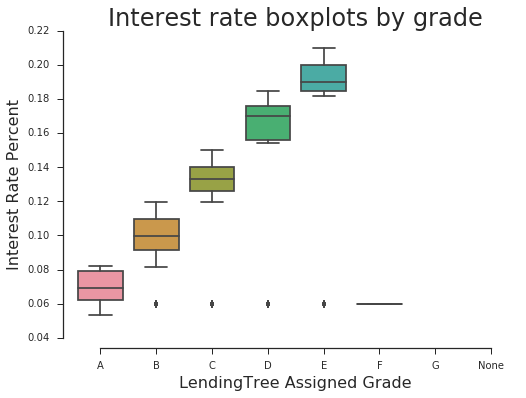

In [161]:
boxplot_by_grade(plt.gca(), bp_title="Interest rate boxplots by grade", y_col="int_rate", y_label="Interest Rate Percent")

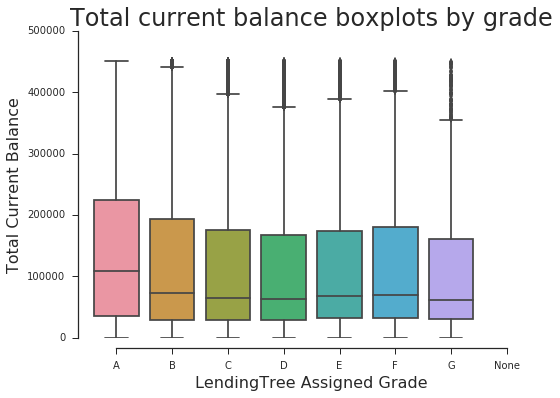

In [162]:
boxplot_by_grade(plt.gca(), bp_title="Total current balance boxplots by grade", y_col="tot_cur_bal", y_label="Total Current Balance")

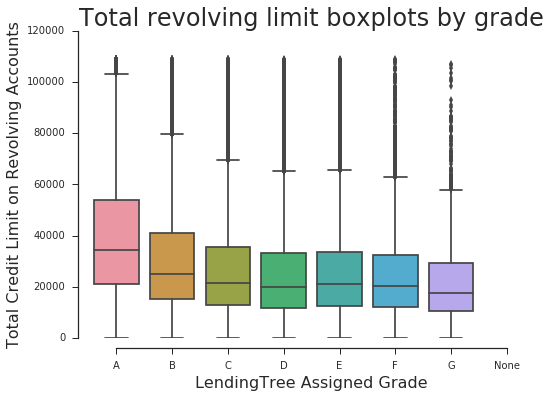

In [163]:
boxplot_by_grade(plt.gca(), bp_title="Total revolving limit boxplots by grade", y_col="total_rev_hi_lim", y_label="Total Credit Limit on Revolving Accounts")

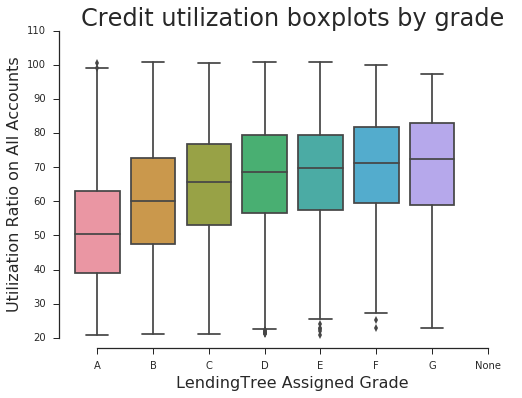

In [164]:
boxplot_by_grade(plt.gca(), bp_title="Credit utilization boxplots by grade", y_col="all_util", y_label="Utilization Ratio on All Accounts")

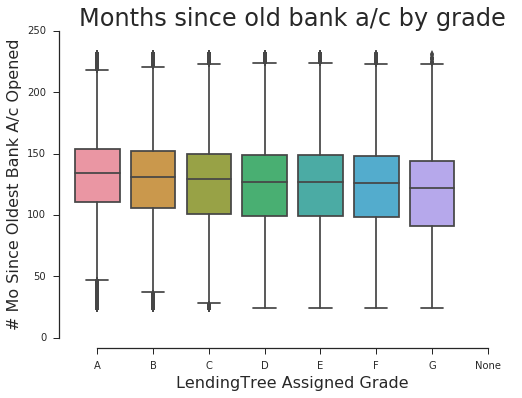

In [172]:
boxplot_by_grade(plt.gca(), bp_title="Months since old bank a/c by grade", y_col="mo_sin_old_il_acct", y_label="# Mo Since Oldest Bank A/c Opened")